<a href="https://colab.research.google.com/github/aditya26droid/Credit-Card-Transaction/blob/main/Fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
upload=files.upload()

Saving fraud_data.csv to fraud_data.csv


In [3]:
data=pd.read_csv("/content/fraud_data.csv")

In [4]:
data.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2994681,0,242834,25.000,H,9803,583.0,150.0,visa,226.0,...,firefox 56.0,24.0,1920x1080,match_status:2,T,F,T,T,desktop,rv:56.0
1,3557242,0,15123000,117.000,W,7919,194.0,150.0,mastercard,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3327470,0,8378575,73.773,C,12778,500.0,185.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3118781,0,2607840,400.000,R,12316,548.0,150.0,visa,195.0,...,mobile safari generic,32.0,1136x640,match_status:2,T,F,T,F,mobile,iOS Device
4,3459772,0,12226544,31.950,W,9002,453.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59054 entries, 0 to 59053
Columns: 434 entries, TransactionID to DeviceInfo
dtypes: float64(385), int64(18), object(31)
memory usage: 195.5+ MB


In [6]:
data.describe()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
count,5.905400e+04,59054.000000,5.905400e+04,59054.000000,59054.000000,58139.000000,58896.000000,58610.000000,52326.000000,52326.000000,...,14061.00000,4511.000000,14059.000000,14054.000000,525.000000,525.000000,487.000000,524.000000,525.000000,7715.000000
mean,3.282166e+06,0.033952,7.368220e+06,134.142888,9910.366360,362.438054,153.264551,199.104231,290.653939,86.806616,...,189.89958,14.238750,351.767622,404.594777,385.257143,15.748571,12.739220,326.225191,148.794286,26.499028
std,1.702573e+05,0.181107,4.612063e+06,233.112295,4893.704524,157.360648,11.395609,41.296438,101.796538,2.639572,...,30.34787,1.524658,141.600677,152.201538,213.565534,6.496154,2.275238,97.662855,31.168092,3.739140
min,2.987019e+06,0.000000,8.673000e+04,0.292000,1008.000000,100.000000,100.000000,100.000000,100.000000,13.000000,...,100.00000,11.000000,100.000000,100.000000,114.000000,14.000000,11.000000,100.000000,100.000000,0.000000
25%,3.135748e+06,0.000000,3.074217e+06,42.950000,6019.000000,215.000000,150.000000,166.000000,204.000000,87.000000,...,166.00000,13.000000,266.000000,256.000000,252.000000,14.000000,11.000000,321.000000,119.000000,24.000000
50%,3.282062e+06,0.000000,7.288450e+06,68.017000,9749.000000,361.000000,150.000000,226.000000,299.000000,87.000000,...,166.00000,15.000000,339.000000,484.000000,252.000000,14.000000,11.000000,321.000000,147.000000,24.000000
75%,3.429699e+06,0.000000,1.123918e+07,117.000000,14223.000000,512.000000,150.000000,226.000000,330.000000,87.000000,...,225.00000,15.000000,427.000000,533.000000,554.000000,14.000000,15.000000,361.000000,169.000000,32.000000
max,3.577536e+06,1.000000,1.581105e+07,5279.950000,18390.000000,600.000000,229.000000,237.000000,536.000000,102.000000,...,225.00000,29.000000,670.000000,660.000000,854.000000,43.000000,24.000000,548.000000,216.000000,32.000000


In [7]:
#Now we will do imputation
#imputation is basically filling the unreal values that are either missing due to some error
#if missing values are very large i.e. 80% data is missing then it's better not to go with that data

In [8]:
# we will impute variables with less than 20% missing values


In [9]:
#if numerical then we will use mean for filling missing values
#if categorical data is missing then we will use mode  for filling up the missing values


In [10]:
#First we will chk unique value in dataset

In [11]:
fraudlent=data.isFraud.value_counts()

Text(0, 0.5, 'No of Transactions ')

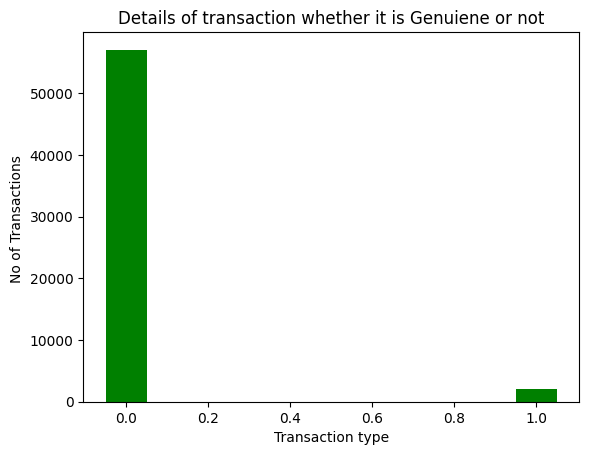

In [12]:
plt.bar(fraudlent.index,fraudlent.values,color='green',width=0.1)
plt.title("Details of transaction whether it is Genuiene or not")
plt.xlabel("Transaction type")
plt.ylabel("No of Transactions ")

It is clearly visible that there is data imbalance and we knew it from the begining as only a few percent of the total transaction is going to be fraudelent.We see that there is clear data imbalance so we cannot directly feed our algo with imbalanced dataset

In [13]:
frauddata=data[data["isFraud"]==1]

In [14]:
a=frauddata["DeviceType"].value_counts()

<BarContainer object of 2 artists>

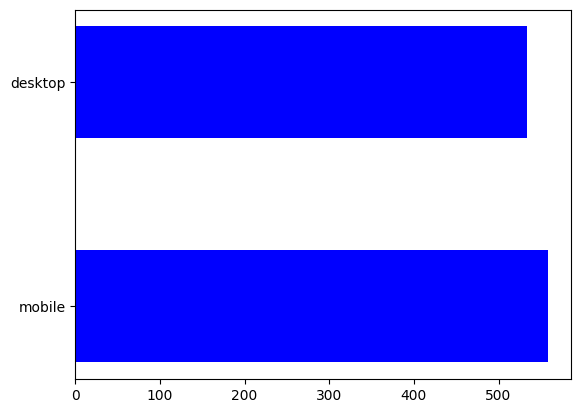

In [15]:
plt.barh(a.index,a.values,color='blue',height=0.5)

In [16]:
b=frauddata["DeviceInfo"].value_counts()

In [17]:
b=b[b.values>=10]

In [18]:
b=(b*100)/b.values.sum()

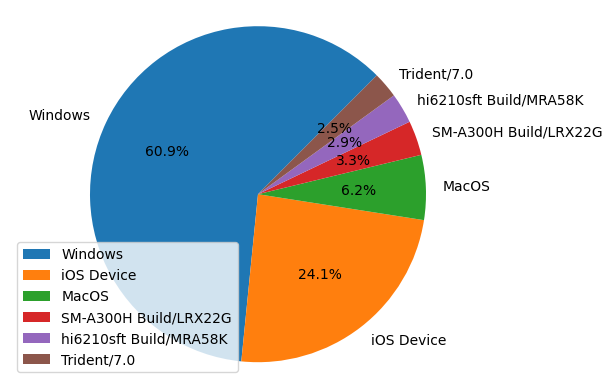

In [23]:
plt.pie(b.values,labels=b.index,autopct='%1.1f%%',startangle=45)
plt.axis("equal")
plt.legend(loc=3)
plt.show()

In [24]:
#Now imputing the missing values

In [25]:
data = data[data.columns[data.isnull().mean() < 0.2]] # Will keep those columns which has missing values less than 20%

In [26]:
#Filling the missing values as we know that remaining column have data greater than 80%
num_cols = data.select_dtypes(include=np.number).columns # getting all the numerical columns

data[num_cols] = data[num_cols].fillna(data[num_cols].mean()) # fills the missing values with mean

In [27]:
cat_col=data.select_dtypes(include='object').columns # getting all the categorical columns

data[cat_col]=data[cat_col].fillna(data[cat_col].mode().iloc[0]) # fills the missing values with maximum occuring element in the column


In [28]:
# Let's have a look if there still exist any missing values
data.isnull().sum() / len(data) * 100

TransactionID     0.0
isFraud           0.0
TransactionDT     0.0
TransactionAmt    0.0
ProductCD         0.0
                 ... 
V317              0.0
V318              0.0
V319              0.0
V320              0.0
V321              0.0
Length: 182, dtype: float64

In [29]:
#One Hot Encoding 
#Basically coverting categorical data to numerical one with no significance of ranking 
#Its just we want to make them to numerical so it can be used by our ML model

In [30]:
data=pd.get_dummies(data, columns=cat_col)

In [31]:
data.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,P_emaildomain_web.de,P_emaildomain_windstream.net,P_emaildomain_yahoo.co.jp,P_emaildomain_yahoo.co.uk,P_emaildomain_yahoo.com,P_emaildomain_yahoo.com.mx,P_emaildomain_yahoo.de,P_emaildomain_yahoo.es,P_emaildomain_yahoo.fr,P_emaildomain_ymail.com
0,2994681,0,242834,25.000,9803,583.0,150.0,226.0,269.0,87.0,...,0,0,0,0,1,0,0,0,0,0
1,3557242,0,15123000,117.000,7919,194.0,150.0,166.0,181.0,87.0,...,0,0,0,0,0,0,0,0,0,0
2,3327470,0,8378575,73.773,12778,500.0,185.0,224.0,284.0,60.0,...,0,0,0,0,0,0,0,0,0,0
3,3118781,0,2607840,400.000,12316,548.0,150.0,195.0,441.0,87.0,...,0,0,0,0,0,0,0,0,0,0
4,3459772,0,12226544,31.950,9002,453.0,150.0,226.0,264.0,87.0,...,0,0,0,0,1,0,0,0,0,0


In [32]:
#seprating our Input and Output Features 
x=data.drop(columns=['isFraud'])  # input features
y=data.isFraud # output feature

In [33]:
#Single Imputation when we have to missing value fully at random
#Multiple Imputation when Our missing variable is dependent over other variables
#Advance technique in case when missingness is related to outcome variable predicted itself

In [34]:
#Now doing standardization of data
#Basically what we have to do is to normalize our data which basically means that my data has different range
#We now have to make our data in standard that it will lie between our standard deviation

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [36]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 20, sampling_strategy = 1.0) # again we are eqalizing both the classes

In [37]:
# fit the sampling
X_train, Y_train = sm.fit_resample(X_train, Y_train)

In [38]:
np.unique(Y_train, return_counts=True) # Y_train is numpy array, so unique() functions returns the count of all the unique elements in the array

(array([0, 1]), array([39942, 39942]))

In [39]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion='entropy')

In [40]:
rfc.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy')

In [41]:
rfc.score(X_test, Y_test)

0.9752215386352091

We got a Score of 97% That is very high so our model has a very high accuracy
We can change our  

In [42]:
from sklearn.feature_selection import SelectKBest, f_classif

In [43]:
selector = SelectKBest(f_classif)

In [45]:
X_new = selector.fit_transform(x, y)


/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [160] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_new, y, test_size = 0.2, random_state = 42)

In [48]:
rfc.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy')

In [49]:
rfc.score(X_test, Y_test)

0.969265938531877

Conclusion
We used different charts to generate insights which device or software were used often for these fraudlent transactions.
We observed that the dataset contained missing values. We removed some columns and filled missing values for numerical column with mean and categorical column with mode (i.e. the maximum occuring value).
We observed that the dataset was imblanced. We used 'SMOTE' to generate new data to deal with the problem of imbalanced data.
We build Random Forest model, got accuracy score of 97.53%.
Then we selected only 10 most important features using selectKBest and f_classif. Here the model complexity is reduced a lot (which is very good) with very little decrease in accuracy that is 96.92%
